In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.dates as pltdt
%matplotlib inline

import seaborn as sns
sns.set_style("darkgrid")

In [2]:
power_countries_1986_2015 = pd.read_csv("EMHIRESPV_TSh_CF_Country_19862015.csv")
meteorological_france_2006_2015 = pd.read_csv("france_2006_2015_ver2_0_9258_487749847.csv", sep=";")


In [3]:
print(power_countries_1986_2015.head())

    AT   BE   BG   CH  CY   CZ   DE   DK   EE   ES ...    LV   NL   NO   PL  \
0  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

    PT   RO   SI   SK   SE   UK  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 29 columns]


In [4]:
print(meteorological_france_2006_2015.head())

   GRID_NO  LATITUDE  LONGITUDE  ALTITUDE       DAY  TEMPERATURE_MAX  \
0    93087  48.76626     2.3898        43  20060101              8.0   
1    93087  48.76626     2.3898        43  20060102              7.1   
2    93087  48.76626     2.3898        43  20060103              6.9   
3    93087  48.76626     2.3898        43  20060104              4.1   
4    93087  48.76626     2.3898        43  20060105              1.4   

   TEMPERATURE_MIN  TEMPERATURE_AVG  WINDSPEED  VAPOURPRESSURE  PRECIPITATION  \
0              3.0              5.5        4.6            8.13            8.4   
1              4.9              6.0        3.3            7.27            0.0   
2              4.2              5.5        1.4            7.78            1.0   
3              2.7              3.4        2.7            6.57            0.2   
4             -0.8              0.3        3.4            5.56            0.1   

     E0   ES0   ET0  RADIATION  SNOWDEPTH  
0  0.34  0.31  0.46       2166      

In [5]:
power_countries_1986_2015.shape

(262968, 29)

In [6]:
meteorological_france_2006_2015.shape

(3662956, 16)

In [7]:
t_h = pd.date_range('1/1/1986', periods=262968, freq='H')

In [8]:
power_countries_1986_2015["HOUR"] = t_h
power_countries_1986_2015.set_index("HOUR", inplace = True)

In [9]:
print(power_countries_1986_2015.head())

                      AT   BE   BG   CH  CY   CZ   DE   DK   EE   ES ...   \
HOUR                                                                 ...    
1986-01-01 00:00:00  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...    
1986-01-01 01:00:00  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...    
1986-01-01 02:00:00  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...    
1986-01-01 03:00:00  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...    
1986-01-01 04:00:00  0.0  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0 ...    

                      LV   NL   NO   PL   PT   RO   SI   SK   SE   UK  
HOUR                                                                   
1986-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1986-01-01 01:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1986-01-01 02:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1986-01-01 03:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1986-01-01 04:00:00  0.0  0.

In [10]:
power_countries_1986_2015['DAY']=power_countries_1986_2015.index.map(lambda x: x.strftime('%Y-%m-%d'))
power_countries_1986_2015_day = power_countries_1986_2015.groupby('DAY').mean()

In [11]:
power_countries_1986_2015_day.shape

(10957, 29)

In [12]:
print(power_countries_1986_2015_day.head())

                  AT        BE        BG        CH  CY        CZ        DE  \
DAY                                                                          
1986-01-01  0.047786  0.023020  0.048940  0.065907   0  0.041685  0.031583   
1986-01-02  0.045921  0.036297  0.067995  0.077502   0  0.026427  0.023506   
1986-01-03  0.067308  0.021352  0.101287  0.103680   0  0.057274  0.046181   
1986-01-04  0.043833  0.050756  0.039337  0.075418   0  0.025843  0.025011   
1986-01-05  0.082394  0.014302  0.033055  0.090867   0  0.065186  0.028168   

                  DK        EE        ES    ...           LV        NL  \
DAY                                         ...                          
1986-01-01  0.017365  0.014149  0.079043    ...     0.019004  0.014293   
1986-01-02  0.014981  0.015682  0.119019    ...     0.013771  0.020373   
1986-01-03  0.023478  0.009570  0.106574    ...     0.011871  0.010782   
1986-01-04  0.020003  0.008595  0.135060    ...     0.013604  0.030366   
1986-01-0

In [13]:
power_countries_2006_2015_day = power_countries_1986_2015_day.loc["2006-01-01":"2015-12-31"]

In [14]:
power_countries_2006_2015_day.shape

(3652, 29)

In [15]:
t_d = pd.date_range('1/1/2006', periods=3652, freq='D')
t_d.shape

(3652,)

In [16]:
power_france_2006_2015_day = power_countries_2006_2015_day["FR"]

In [17]:
power_france_2006_2015_day.shape

(3652,)

In [18]:
power_france_2006_2015_day.head()

DAY
2006-01-01    0.040878
2006-01-02    0.050066
2006-01-03    0.046397
2006-01-04    0.061315
2006-01-05    0.042258
Name: FR, dtype: float64

In [19]:
meteorological_france_2006_2015_day = meteorological_france_2006_2015.groupby('DAY').mean()

In [20]:
meteorological_france_2006_2015_day.shape

(3652, 15)

In [21]:
meteorological_france_2006_2015_day["DAY"] = t_d
meteorological_france_2006_2015_day.set_index("DAY", inplace=True)

In [22]:
meteorological_france_2006_2015_day.shape

(3652, 15)

In [23]:
print(meteorological_france_2006_2015_day.head())

                 GRID_NO   LATITUDE  LONGITUDE    ALTITUDE  TEMPERATURE_MAX  \
DAY                                                                           
2006-01-01  82982.985045  46.453877   2.589603  290.929212         7.536590   
2006-01-02  82982.985045  46.453877   2.589603  290.929212         6.788734   
2006-01-03  82982.985045  46.453877   2.589603  290.929212         6.067498   
2006-01-04  82982.985045  46.453877   2.589603  290.929212         4.679661   
2006-01-05  82982.985045  46.453877   2.589603  290.929212         2.080359   

            TEMPERATURE_MIN  TEMPERATURE_AVG  WINDSPEED  VAPOURPRESSURE  \
DAY                                                                       
2006-01-01         2.931306         5.234895   5.001097        7.792114   
2006-01-02         3.453141         5.121934   3.652941        7.303749   
2006-01-03         1.962014         4.015254   2.862612        6.738744   
2006-01-04         0.788136         2.735593   3.160020        6.270528

In [24]:
france_2006_2015_day = pd.concat([power_france_2006_2015_day, meteorological_france_2006_2015_day], axis=1)

In [25]:
france_2006_2015_day.shape

(3652, 16)

In [26]:
print(france_2006_2015_day.head())

                  FR       GRID_NO   LATITUDE  LONGITUDE    ALTITUDE  \
DAY                                                                    
2006-01-01  0.040878  82982.985045  46.453877   2.589603  290.929212   
2006-01-02  0.050066  82982.985045  46.453877   2.589603  290.929212   
2006-01-03  0.046397  82982.985045  46.453877   2.589603  290.929212   
2006-01-04  0.061315  82982.985045  46.453877   2.589603  290.929212   
2006-01-05  0.042258  82982.985045  46.453877   2.589603  290.929212   

            TEMPERATURE_MAX  TEMPERATURE_MIN  TEMPERATURE_AVG  WINDSPEED  \
DAY                                                                        
2006-01-01         7.536590         2.931306         5.234895   5.001097   
2006-01-02         6.788734         3.453141         5.121934   3.652941   
2006-01-03         6.067498         1.962014         4.015254   2.862612   
2006-01-04         4.679661         0.788136         2.735593   3.160020   
2006-01-05         2.080359        -1.5

In [27]:
france_2006_2015_day.index = pd.to_datetime(france_2006_2015_day.index)
france_2006_2015_day.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2015-12-22', '2015-12-23', '2015-12-24', '2015-12-25',
               '2015-12-26', '2015-12-27', '2015-12-28', '2015-12-29',
               '2015-12-30', '2015-12-31'],
              dtype='datetime64[ns]', name='DAY', length=3652, freq=None)

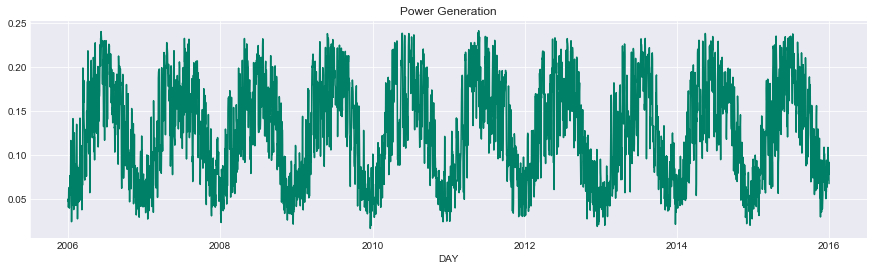

In [28]:
france_2006_2015_day["FR"].plot(figsize=(15, 4), title="Power Generation", kind="line", colormap="summer")

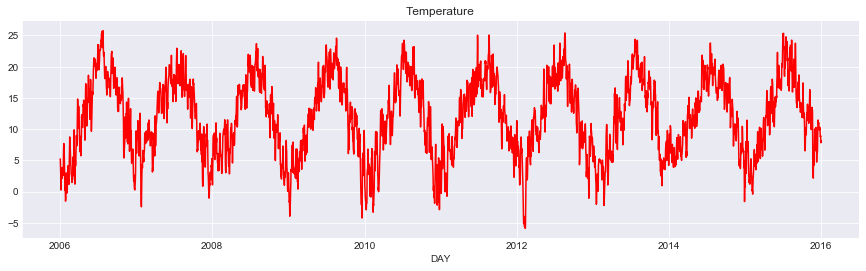

In [29]:
france_2006_2015_day["TEMPERATURE_AVG"].plot(figsize=(15, 4), title="Temperature", kind="line", colormap="flag")

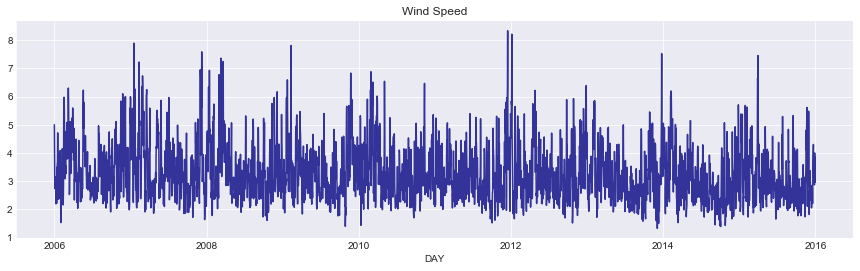

In [30]:
france_2006_2015_day["WINDSPEED"].plot(figsize=(15, 4), title="Wind Speed", kind="line", colormap="terrain")

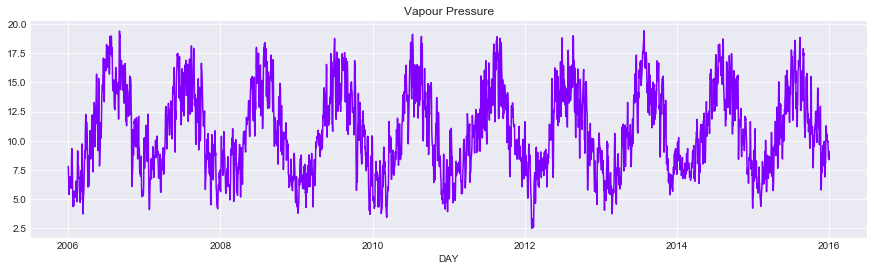

In [31]:
france_2006_2015_day["VAPOURPRESSURE"].plot(figsize=(15, 4), title="Vapour Pressure", kind="line", colormap="rainbow")

In [33]:
france_2006_2015_day["MONTH"] = france_2006_2015_day.index.map(lambda x: x.strftime("%Y-%m"))
france_2006_2015_day["MONTH_ONLY"] = france_2006_2015_day.index.map(lambda x: x.strftime("%m"))
france_2006_2015_month = france_2006_2015_day.groupby("MONTH").mean()
france_2006_2015_month.index = pd.to_datetime(france_2006_2015_month.index)
france_2006_2015_month.index

DatetimeIndex(['2006-01-01', '2006-02-01', '2006-03-01', '2006-04-01',
               '2006-05-01', '2006-06-01', '2006-07-01', '2006-08-01',
               '2006-09-01', '2006-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='MONTH', length=120, freq=None)

In [34]:
print(france_2006_2015_month.head())

                  FR       GRID_NO   LATITUDE  LONGITUDE    ALTITUDE  \
MONTH                                                                  
2006-01-01  0.071327  82982.985045  46.453877   2.589603  290.929212   
2006-02-01  0.074850  82982.985045  46.453877   2.589603  290.929212   
2006-03-01  0.112173  82982.985045  46.453877   2.589603  290.929212   
2006-04-01  0.153745  82982.985045  46.453877   2.589603  290.929212   
2006-05-01  0.156981  82982.985045  46.453877   2.589603  290.929212   

            TEMPERATURE_MAX  TEMPERATURE_MIN  TEMPERATURE_AVG  WINDSPEED  \
MONTH                                                                      
2006-01-01         5.890522         0.120606         3.006030   3.231396   
2006-02-01         6.563517         0.210504         3.387327   3.574530   
2006-03-01        10.895160         3.095089         6.995607   4.411556   
2006-04-01        15.449438         5.642047        10.546248   3.418664   
2006-05-01        19.311877         9.7

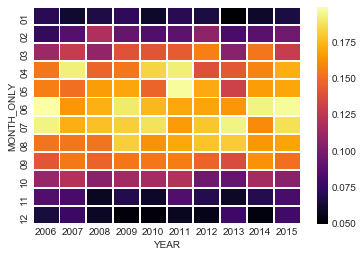

In [39]:
france_2006_2015_day["YEAR"] = france_2006_2015_day.index.map(lambda x: x.strftime("%Y"))
france_2006_2015_day["DAY_ONLY"] = france_2006_2015_day.index.map(lambda x: x.strftime("%d"))
fr_heatmap = france_2006_2015_day.pivot_table(index="MONTH_ONLY", columns="YEAR", values="FR")
fr_heatmap.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(fr_heatmap, cmap="inferno", linewidths=0.9)

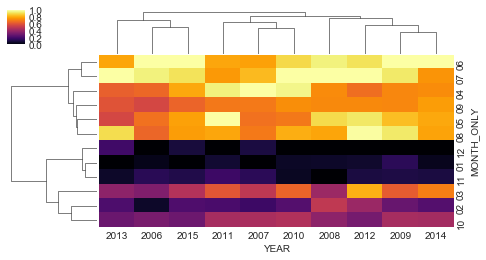

In [40]:
sns.clustermap(fr_heatmap, cmap="inferno", standard_scale=1, figsize=(8, 4))

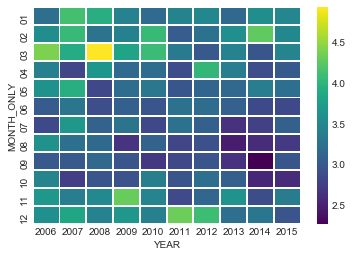

In [41]:
fr_heatmap = france_2006_2015_day.pivot_table(index="MONTH_ONLY", columns="YEAR", values="WINDSPEED")
fr_heatmap.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(fr_heatmap, cmap="viridis", linewidths=0.9)

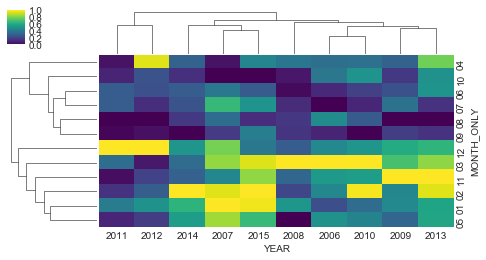

In [42]:
sns.clustermap(fr_heatmap, cmap="viridis", standard_scale=1, figsize=(8, 4))

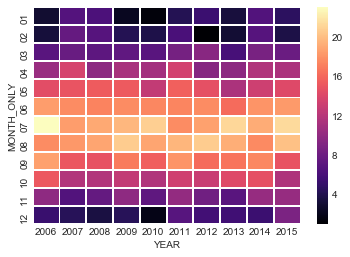

In [43]:
fr_heatmap = france_2006_2015_day.pivot_table(index="MONTH_ONLY", columns="YEAR", values="TEMPERATURE_AVG")
fr_heatmap.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(fr_heatmap, cmap="magma", linewidths=0.9)

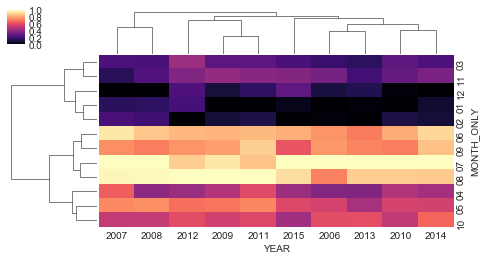

In [44]:
sns.clustermap(fr_heatmap, cmap="magma", standard_scale=1, figsize=(8, 4))

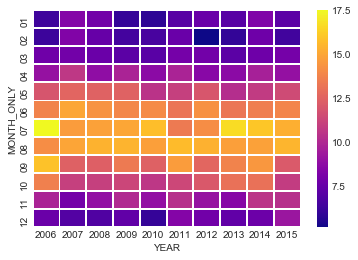

In [46]:
fr_heatmap = france_2006_2015_day.pivot_table(index="MONTH_ONLY", columns="YEAR", values="VAPOURPRESSURE")
fr_heatmap.sort_index(level=0, ascending=True, inplace=True)
sns.heatmap(fr_heatmap, cmap="plasma", linewidths=0.9)

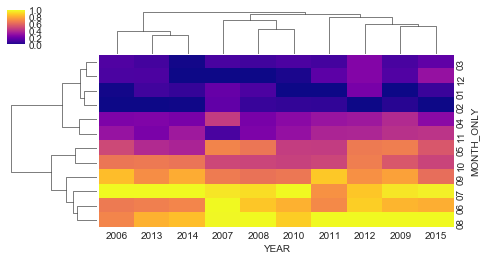

In [47]:
sns.clustermap(fr_heatmap, cmap="plasma", standard_scale=1, figsize=(8, 4))